# Actividad - Diagnóstico de modelos usando statsmodels

## Ejercicio 1

Se quiere saber si los años de experiencia de los 30 colaboradores se encuentran asociados con el salario.

In [55]:
import pandas as pd
data = pd.read_csv("Salary_data.csv")
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [56]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


## Generación de matrices

In [58]:
from patsy import dmatrices
y, X = dmatrices('Salary ~ YearsExperience', data = data, return_type = 'dataframe')

In [59]:
import statsmodels.api as sm
modelo = sm.OLS(y, X)
resultado = modelo.fit()
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sat, 19 Dec 2020   Prob (F-statistic):           1.14e-20
Time:                        23:18:28   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     

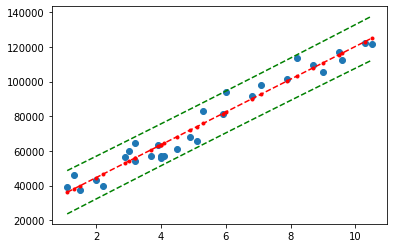

In [60]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import matplotlib.pyplot as plt
%matplotlib inline
mean_pred, lower, upper = wls_prediction_std(resultado)
X = data['YearsExperience']
plt.plot(X, y, 'o', label="data")
plt.plot(X, resultado.fittedvalues, 'r--.', label="OLS")
plt.plot(X, upper, 'g--')
plt.plot(X, lower, 'g--');

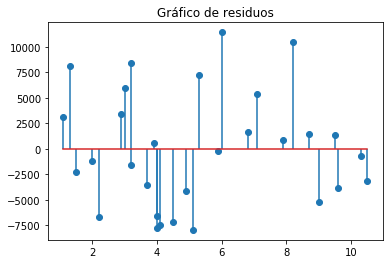

In [61]:
## Gráfico de residuos
plt.stem(data['YearsExperience'], resultado.resid, use_line_collection=True);
plt.title("Gráfico de residuos")
plt.show()

### La variante

Ahora se dejan los años de experiencia como la variable dependiente

In [62]:
y, X = dmatrices('YearsExperience ~ Salary', data = data, return_type = 'dataframe')
modelo = sm.OLS(y, X)
resultado = modelo.fit()
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:        YearsExperience   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sat, 19 Dec 2020   Prob (F-statistic):           1.14e-20
Time:                        23:19:59   Log-Likelihood:                -26.168
No. Observations:                  30   AIC:                             56.34
Df Residuals:                      28   BIC:                             59.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.3832      0.327     -7.281      0.0

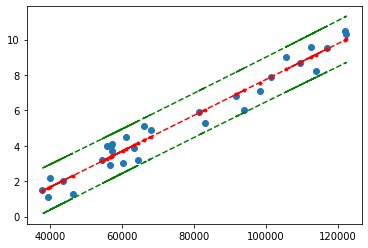

In [63]:
mean_pred, lower, upper = wls_prediction_std(resultado)
X = data['Salary']
plt.plot(X, y, 'o', label="data")
plt.plot(X, resultado.fittedvalues, 'r--.', label="OLS")
plt.plot(X, upper, 'g--')
plt.plot(X, lower, 'g--');

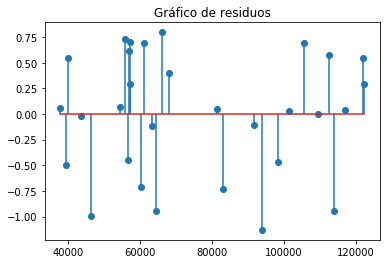

In [64]:
## Gráfico de residuos
plt.stem(data['Salary'], resultado.resid, use_line_collection=True);
plt.title("Gráfico de residuos")
plt.show()

## Ejercicio 2 - Pesos y estaturas

Se quiere saber si el peso de 23 observaciones se encuentra asociado con la estatura. También deberá analizar el caso inverso.

In [66]:
data_hw = pd.read_csv("PesoEstaturaMujeres.csv")
data_hw

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20
5,1.60,58.57
6,1.63,59.93
7,1.65,61.29
8,1.68,63.11
9,1.70,64.47


In [67]:
data_hw.describe()

,Height,Weight
count,23.000000,23.000000
mean,1.662609,63.346957
std,0.112703,6.839575
min,1.470000,52.210000
25%,1.575000,57.885000
50%,1.670000,63.190000
75%,1.740000,69.010000
max,1.890000,74.460000


In [68]:
y, X = dmatrices('Weight ~ Height', data = data_hw, return_type = 'dataframe')
modelo = sm.OLS(y, X)
resultado = modelo.fit()
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     36.55
Date:                Sat, 19 Dec 2020   Prob (F-statistic):           5.33e-06
Time:                        23:21:28   Log-Likelihood:                -64.753
No. Observations:                  23   AIC:                             133.5
Df Residuals:                      21   BIC:                             135.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -17.0627     13.329     -1.280      0.2

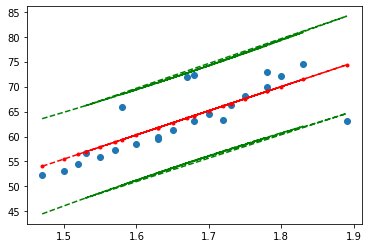

In [69]:
mean_pred, lower, upper = wls_prediction_std(resultado)
X = data_hw['Height']
plt.plot(X, y, 'o', label="data")
plt.plot(X, resultado.fittedvalues, 'r--.', label="OLS")
plt.plot(X, upper, 'g--')
plt.plot(X, lower, 'g--');


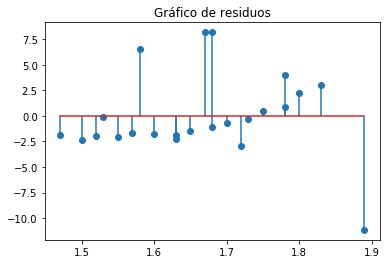

In [70]:
## Gráfico de residuos
plt.stem(data_hw['Height'], resultado.resid, use_line_collection=True);
plt.title("Gráfico de residuos")
plt.show()

In [71]:
y, X = dmatrices('Height ~ Weight', data = data_hw, return_type = 'dataframe')
modelo = sm.OLS(y, X)
resultado = modelo.fit()
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:                 Height   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     36.55
Date:                Sat, 19 Dec 2020   Prob (F-statistic):           5.33e-06
Time:                        23:23:03   Log-Likelihood:                 29.678
No. Observations:                  23   AIC:                            -55.36
Df Residuals:                      21   BIC:                            -53.09
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8307      0.138      6.004      0.0

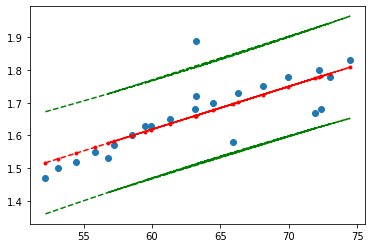

In [72]:
mean_pred, lower, upper = wls_prediction_std(resultado)
X = data_hw['Weight']
plt.plot(X, y, 'o', label="data")
plt.plot(X, resultado.fittedvalues, 'r--.', label="OLS")
plt.plot(X, upper, 'g--')
plt.plot(X, lower, 'g--');

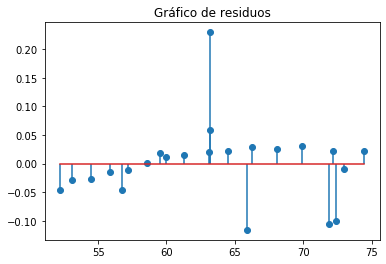

In [73]:
## Gráfico de residuos
plt.stem(data_hw['Weight'], resultado.resid, use_line_collection=True);
plt.title("Gráfico de residuos")
plt.show()